In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')


In [48]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [49]:
data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [50]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
data2=data.copy()

In [52]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

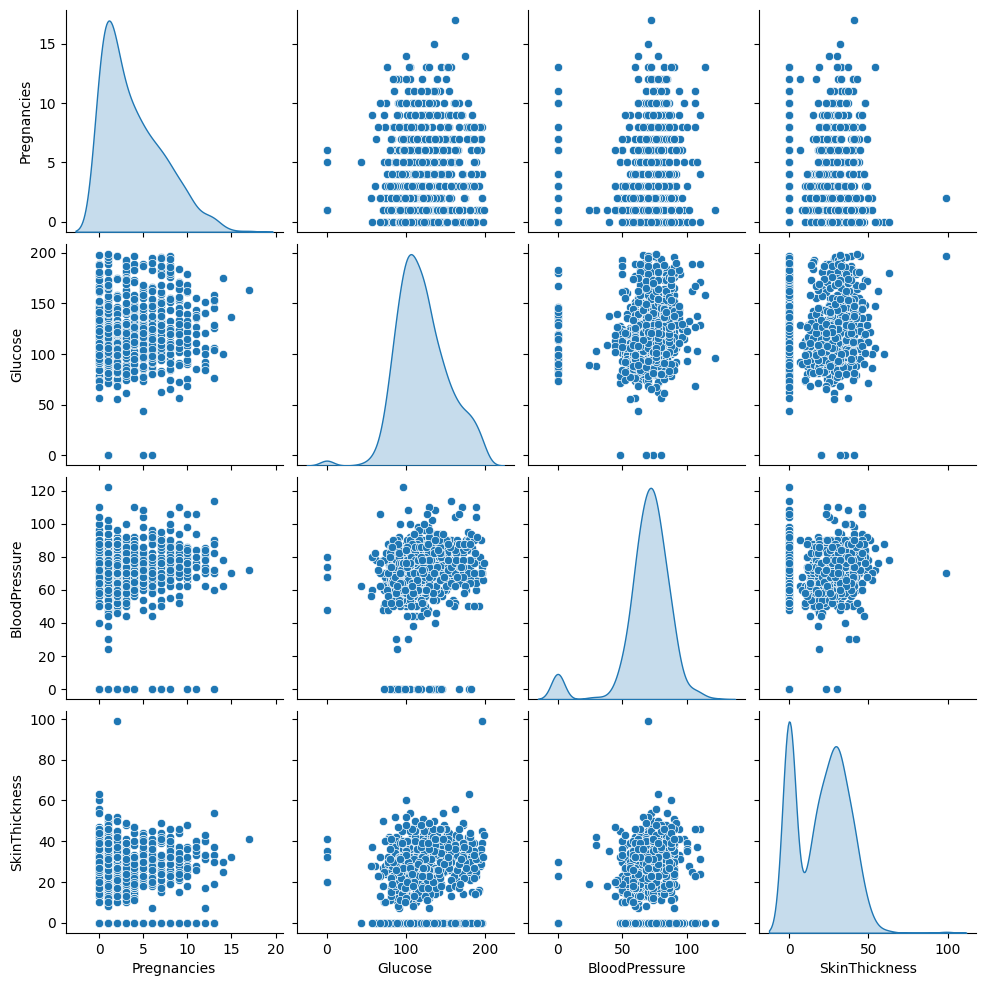

In [53]:
sns.pairplot(data[["Pregnancies",	"Glucose",	"BloodPressure",	"SkinThickness"	]], diag_kind="kde")

classification

In [54]:
#Splitting the data into training and test test
X = data.iloc[:,0:7].values
y = data.iloc[:,8].values

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [55]:
X

array([[  6.   , 148.   ,  72.   , ...,   0.   ,  33.6  ,   0.627],
       [  1.   ,  85.   ,  66.   , ...,   0.   ,  26.6  ,   0.351],
       [  8.   , 183.   ,  64.   , ...,   0.   ,  23.3  ,   0.672],
       ...,
       [  5.   , 121.   ,  72.   , ..., 112.   ,  26.2  ,   0.245],
       [  1.   , 126.   ,  60.   , ...,   0.   ,  30.1  ,   0.349],
       [  1.   ,  93.   ,  70.   , ...,   0.   ,  30.4  ,   0.315]])

In [56]:
Y

array([[0, 1],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [0, 1],
       [1, 0]], dtype=uint8)

In [57]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD,Adam

In [58]:
def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(44, activation='relu', input_shape=(7,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(2, activation='softmax'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model


model = build_model() 

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 44)                352       
                                                                 
 dense_25 (Dense)            (None, 20)                900       
                                                                 
 dense_26 (Dense)            (None, 16)                336       
                                                                 
 dense_27 (Dense)            (None, 2)                 34        
                                                                 
Total params: 1,622
Trainable params: 1,622
Non-trainable params: 0
_________________________________________________________________


In [59]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
20/20 [==============================] - 1s 13ms/step - loss: 1.5740 - accuracy: 0.5244 - val_loss: 0.8881 - val_accuracy: 0.6623
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 0.8220 - accuracy: 0.6107 - val_loss: 0.7070 - val_accuracy: 0.7013
Epoch 3/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6881 - accuracy: 0.6531 - val_loss: 0.6726 - val_accuracy: 0.6623
Epoch 4/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6742 - accuracy: 0.6661 - val_loss: 0.7016 - val_accuracy: 0.6299
Epoch 5/100
20/20 [==============================] - 0s 4ms/step - loss: 0.6555 - accuracy: 0.6417 - val_loss: 0.6574 - val_accuracy: 0.6818
Epoch 6/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6417 - accuracy: 0.6303 - val_loss: 0.6425 - val_accuracy: 0.7013
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.6269 - accuracy: 0.6678 - val_loss: 0.6603 - val_accuracy: 0.6688
Epoch 8/100


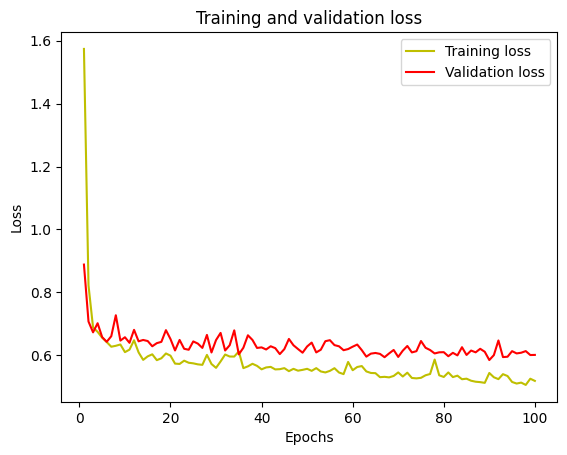

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

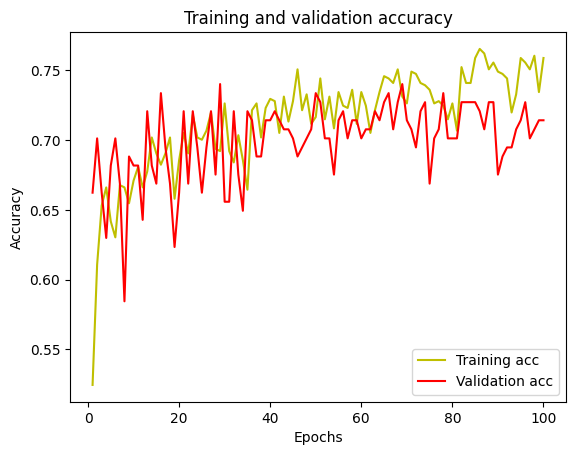

In [61]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       107
           1       0.53      0.55      0.54        47

    accuracy                           0.71       154
   macro avg       0.67      0.67      0.67       154
weighted avg       0.72      0.71      0.72       154

[[84 23]
 [21 26]]


regression

In [63]:
data2=data.drop('Outcome',axis=1)

In [64]:
data2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [65]:
X=data2.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,0.627,50
1,1,85,66,29,0,0.351,31
2,8,183,64,0,0,0.672,32
3,1,89,66,23,94,0.167,21
4,0,137,40,35,168,2.288,33


In [66]:
y = data2['BMI']
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: BMI, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=42)

In [68]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (7,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 64)                512       
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 dense_30 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,625
Trainable params: 2,625
Non-trainable params: 0
_________________________________________________________________


In [70]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
18/18 [==============================] - 1s 14ms/step - loss: 1058.5725 - mse: 1058.5725 - val_loss: 1038.4047 - val_mse: 1038.4047
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 990.2366 - mse: 990.2366 - val_loss: 968.7607 - val_mse: 968.7607
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 919.8061 - mse: 919.8061 - val_loss: 890.7132 - val_mse: 890.7132
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 837.1736 - mse: 837.1736 - val_loss: 799.0911 - val_mse: 799.0911
Epoch 5/100
18/18 [==============================] - 0s 5ms/step - loss: 742.7011 - mse: 742.7011 - val_loss: 696.6204 - val_mse: 696.6204
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 636.9800 - mse: 636.9800 - val_loss: 584.2266 - val_mse: 584.2266
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 524.8141 - mse: 524.8141 - val_loss: 469.1611 - val_mse: 469.1611
Epoch 8/100
18/18 [===

In [71]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 63.7418 - mse: 63.7418


[63.7418098449707, 63.7418098449707]

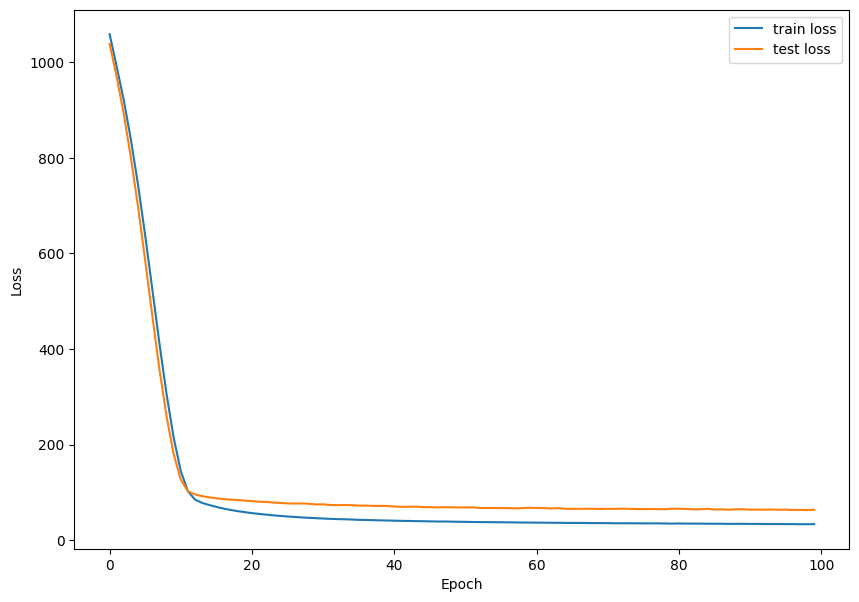

In [72]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

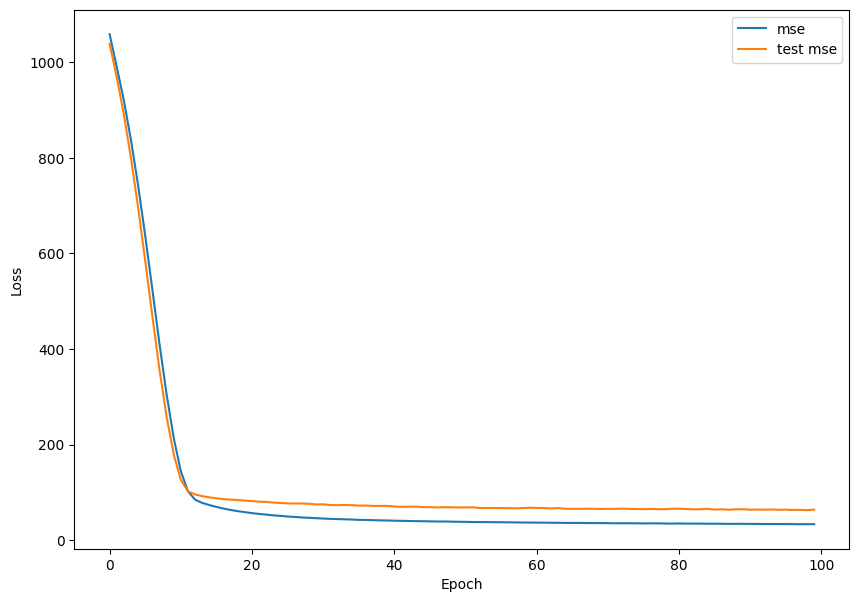

In [73]:
# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()